In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

housing = pd.read_csv('housing.csv')
housing.info

<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  

In [2]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state = 42)
train_set.shape
train_set.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


In [4]:
data  = train_set.copy()
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


<Axes: xlabel='longitude', ylabel='latitude'>

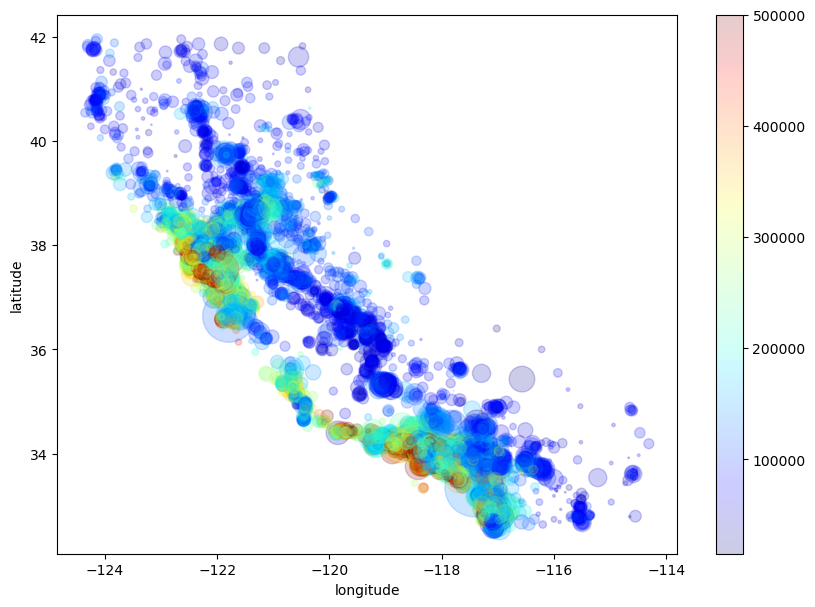

In [5]:
data.plot(kind="scatter", x='longitude', y='latitude', 
          figsize=(10,7), 
          s=data["population"]/20, 
          c=data["median_house_value"], cmap=plt.get_cmap("jet"),
          alpha=0.2)

In [6]:
#standard correlation coefficient - zaribe pierson  [-1,1] fqt vabastegi khatio mige
corr_matrix = data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

C:\Users\Mahtab\AppData\Local\Temp\ipykernel_30820\1988849806.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

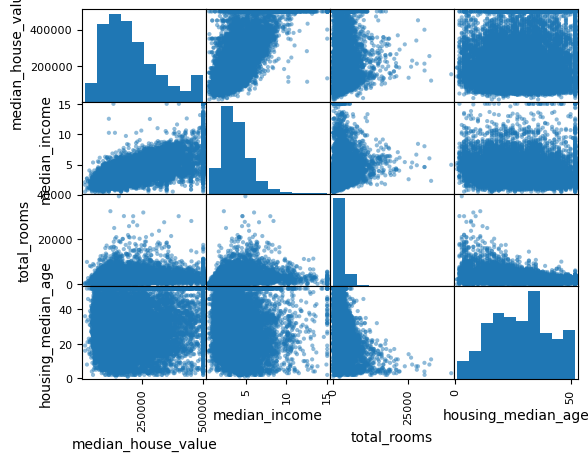

In [7]:
features = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(data[features])
plt.show()
figsize=(15,10)

<Axes: xlabel='median_income', ylabel='median_house_value'>

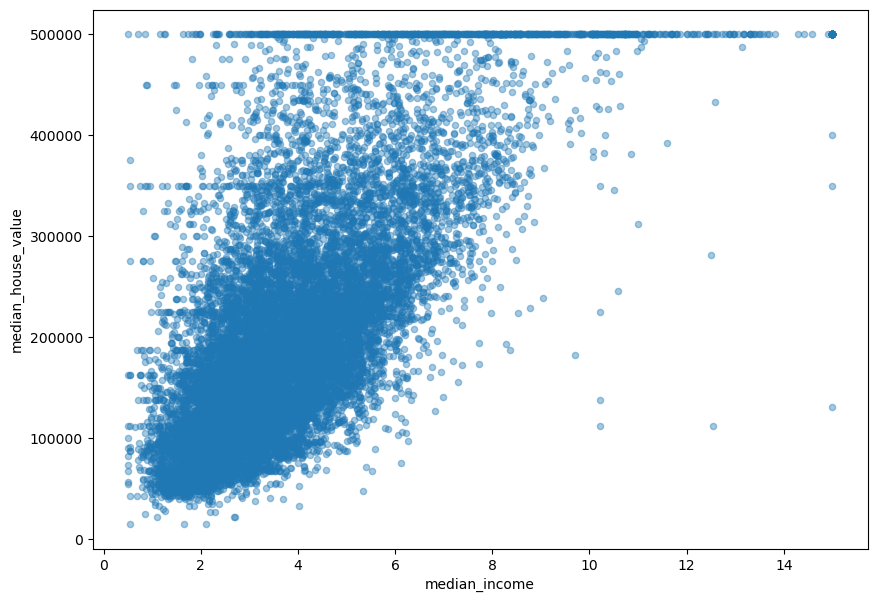

In [8]:
data.plot(kind="scatter", x='median_income', y='median_house_value', 
          figsize=(10,7), 
          alpha=0.4)

In [9]:
# bayad dade ha tamiz she chon ye seri khat hast tush

In [10]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


In [11]:
data["total_rooms_per_household"] = data ["total_rooms"]/data["households"]
data["total_bedrooms_per_total_rooms"] = data ["total_bedrooms"]/data["total_rooms"]
data["population_per_households"] = data ["population"]/data["households"]
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_rooms_per_household,total_bedrooms_per_total_rooms,population_per_households
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN,5.017657,0.200576,3.691814
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN,4.473545,0.232703,1.738095
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN,5.645833,0.174486,2.723214
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN,4.002817,0.258269,3.994366
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND,6.268421,0.180940,2.300000


In [12]:
corr_matrix = data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

C:\Users\Mahtab\AppData\Local\Temp\ipykernel_30820\3974275619.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


median_house_value                1.000000
median_income                     0.690647
total_rooms_per_household         0.158485
total_rooms                       0.133989
housing_median_age                0.103706
households                        0.063714
total_bedrooms                    0.047980
population_per_households        -0.022030
population                       -0.026032
longitude                        -0.046349
latitude                         -0.142983
total_bedrooms_per_total_rooms   -0.257419
Name: median_house_value, dtype: float64

In [13]:
df = train_set.copy()
df_label =  df["median_house_value"].copy()
df= df.drop("median_house_value", axis=1)
df.info

<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14196    -117.03     32.71                33.0       3126.0           627.0   
8267     -118.16     33.77                49.0       3382.0           787.0   
17445    -120.48     34.66                 4.0       1897.0           331.0   
14265    -117.11     32.69                36.0       1421.0           367.0   
2271     -119.80     36.78                43.0       2382.0           431.0   
...          ...       ...                 ...          ...             ...   
11284    -117.96     33.78                35.0       1330.0           201.0   
11964    -117.43     34.02                33.0       3084.0           570.0   
5390     -118.38     34.03                36.0       2101.0           569.0   
860      -121.96     37.58                15.0       3575.0           597.0   
15795    -122.42     37.77                52.0       4226.0          1315.0   

       population  

In [14]:
df_num = df.drop("ocean_proximity", axis=1)

#df_num = df_num.dropna(subset=["total_bedrooms"])

#median = df_num["total_bedrooms"].median()
#df_num["total_bedrooms"].fillna(median)

Imputer = SimpleImputer(missing_values=np.nan, strategy='median')
Imputer.fit(df_num)
X = Imputer.transform(df_num)
df_num_Impute_tr = pd.DataFrame(X, columns=df_num.columns)
df_num_Impute_tr.info()
df_num.info()

df_num_Impute_tr.head()

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
    
custom = CombinedAttributesAdder()
data_custom_tr_tmp = custom.transform(df_num_Impute_tr.values)
data_custom_tr = pd.DataFrame(data_custom_tr_tmp)
columns = list(df_num_Impute_tr.columns)
columns.append("rooms_per_household")
columns.append("population_per_household")
columns.append("bedrooms_per_room")
data_custom_tr.columns = columns
data_custom_tr.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14196 to 15795
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room
0,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,5.017657,3.691814,0.200576
1,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,4.473545,1.738095,0.232703
2,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,5.645833,2.723214,0.174486
3,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,4.002817,3.994366,0.258269
4,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,6.268421,2.300000,0.180940
5,-121.86,37.42,20.0,5032.0,808.0,2695.0,801.0,6.6227,6.282147,3.364544,0.160572
6,-117.97,34.04,28.0,1686.0,417.0,1355.0,388.0,2.5192,4.345361,3.492268,0.247331
7,-122.53,37.91,37.0,2524.0,398.0,999.0,417.0,7.9892,6.052758,2.395683,0.157686
8,-117.90,34.13,5.0,1126.0,316.0,819.0,311.0,1.5000,3.620579,2.633441,0.280639
9,-117.79,34.02,5.0,18690.0,2862.0,9427.0,2777.0,6.4266,6.730284,3.394671,0.153130


In [15]:
data_custom_tr.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.582290,35.643149,28.608285,2642.004784,538.496851,1426.453004,499.986919,3.880754,5.435235,3.096961,0.212858
std,2.005654,2.136665,12.602499,2174.646744,419.007096,1137.056380,380.967964,1.904294,2.387375,11.578744,0.057995
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.888889,0.692308,0.100000
25%,-121.810000,33.930000,18.000000,1454.000000,296.750000,789.000000,280.000000,2.566700,4.452055,2.428799,0.175178
50%,-118.510000,34.260000,29.000000,2129.000000,437.000000,1167.000000,410.000000,3.545800,5.235874,2.817240,0.202808
75%,-118.010000,37.720000,37.000000,3160.000000,647.000000,1726.000000,606.000000,4.773175,6.061037,3.280000,0.239501
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,141.909091,1243.333333,1.000000


In [16]:
from sklearn.preprocessing import StandardScaler

feature_scal = StandardScaler()
data_num_scaled_tr = pd.DataFrame(feature_scal.fit_transform(data_custom_tr.values), columns=data_custom_tr.columns)
data_num_scaled_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room
0,1.272587,-1.372811,0.348490,0.222569,0.211228,0.768276,0.322906,-0.326196,-0.174916,0.051376,-0.211785
1,0.709162,-0.876696,1.618118,0.340293,0.593094,-0.098901,0.672027,-0.035843,-0.402835,-0.117362,0.342185
2,-0.447603,-0.460146,-1.952710,-0.342597,-0.495226,-0.449818,-0.430461,0.144701,0.088216,-0.032280,-0.661658
3,1.232698,-1.382172,0.586545,-0.561490,-0.409306,-0.007434,-0.380587,-1.017864,-0.600015,0.077507,0.783032
4,-0.108551,0.532084,1.142008,-0.119565,-0.256559,-0.485877,-0.314962,-0.171488,0.349007,-0.068832,-0.550364


In [17]:
#from sklearn.preprocessing import LabelEncoder

#encoder = LabelEncoder()
#data_cat = df["ocean_proximity"]
#data_cat_encoded = encoder.fit_transform(data_cat)
#data_cat_encoded = pd.DataFrame(data_cat_encoded, columns=["ocean_proximity"])
#data_cat_encoded.head()



In [21]:
from sklearn.preprocessing import OneHotEncoder

encoder_1hot = OneHotEncoder(sparse=False)
data_cat_1hot_tmp = encoder_1hot.fit_transform(df[["ocean_proximity"]])

# Use the same column names that you used during fitting
encoded_column_names = encoder_1hot.get_feature_names_out(input_features=["ocean_proximity"])

# Create the DataFrame with the one-hot encoded data and set the column names
data_cat_1hot = pd.DataFrame(data_cat_1hot_tmp, columns=encoded_column_names)
data_cat_1hot.head()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0


In [22]:

final = pd.concat([data_num_scaled_tr, data_cat_1hot], axis=1)
final.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,1.272587,-1.372811,0.348490,0.222569,0.211228,0.768276,0.322906,-0.326196,-0.174916,0.051376,-0.211785,0.0,0.0,0.0,0.0,1.0
1,0.709162,-0.876696,1.618118,0.340293,0.593094,-0.098901,0.672027,-0.035843,-0.402835,-0.117362,0.342185,0.0,0.0,0.0,0.0,1.0
2,-0.447603,-0.460146,-1.952710,-0.342597,-0.495226,-0.449818,-0.430461,0.144701,0.088216,-0.032280,-0.661658,0.0,0.0,0.0,0.0,1.0
3,1.232698,-1.382172,0.586545,-0.561490,-0.409306,-0.007434,-0.380587,-1.017864,-0.600015,0.077507,0.783032,0.0,0.0,0.0,0.0,1.0
4,-0.108551,0.532084,1.142008,-0.119565,-0.256559,-0.485877,-0.314962,-0.171488,0.349007,-0.068832,-0.550364,0.0,1.0,0.0,0.0,0.0
5,-1.135679,0.831625,-0.683082,1.099060,0.643214,1.115675,0.790151,1.439919,0.354757,0.023111,-0.901575,1.0,0.0,0.0,0.0,0.0
6,0.803897,-0.750327,-0.048268,-0.439627,-0.289972,-0.062842,-0.293963,-0.715013,-0.456530,0.034142,0.594427,1.0,0.0,0.0,0.0,0.0
7,-1.469745,1.060961,0.665897,-0.054266,-0.335319,-0.375941,-0.217838,2.157529,0.258670,-0.060568,-0.951342,0.0,0.0,0.0,1.0,0.0
8,0.838800,-0.708204,-1.873359,-0.697148,-0.531026,-0.534249,-0.496085,-1.250241,-0.760128,-0.040033,1.168774,1.0,0.0,0.0,0.0,0.0
9,0.893646,-0.759688,-1.873359,7.379811,5.545428,7.036405,5.977096,1.336938,0.542474,0.025712,-1.029905,1.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator TransformerMixin
from sklearn.pipeline import FeatureUnion

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
    
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None)
        return self
    def transform(self, X)
        return X[self.attribute_names].values
    
    df=train_set.copy()
    df_label = df["median_house_value"].copy()
    df=df.drop("median_house_value", axis = 1)
    
    df_num = df.drop(["ocean_proximity"], axis=1)
    num_attrs = list(df_num)
    cat_attrs = ["ocean_proximity"]
    
    num_pipeline = Pipeline([
        'selector', DataFrameSelector(cat_attrs)), 
        ('one_hot_encodr', OneHotEncoder(sparse=False)),
    ])
    
    cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attrs)),
        ('one_hot_encoder', OneHotEncoder(sparse=False)),
    ])
    
    full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline), 
        ("cat_pipeline", cat_pipeline),
    ])
    
    housing_prepared = full_pipeline.fit_transform(df)
    housing_prepared_df = pd.DataFrame(housing_prepared, columns =['longitude', 'latitude', 'housing median_age', 'total_rooms',
                                                                   'total_bedrooms', 'population', 'households', 'median_income', 
                                                                  'rooms_per_household', 'population_per_household', 
                                                                  'bedrooms_per_room', 'ocean_proximity_<1H OCEAN', 
                                                                   'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 
                                                                   'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'
                                                                 
    ] )
    housing_prepared_df.head()

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared_df, df_label)
sample_data_prepared = housing_prepared_df.iloc[:4]
print("Predictions:\t", lin_reg.predict(sample_data_prepared))
sample_labels = df_label.iloc[:4]
print("Labels:\t\t", list(sample_labels))

In [ ]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared_df)
lin_mse = np.sort(lin.mse)
lin_mse